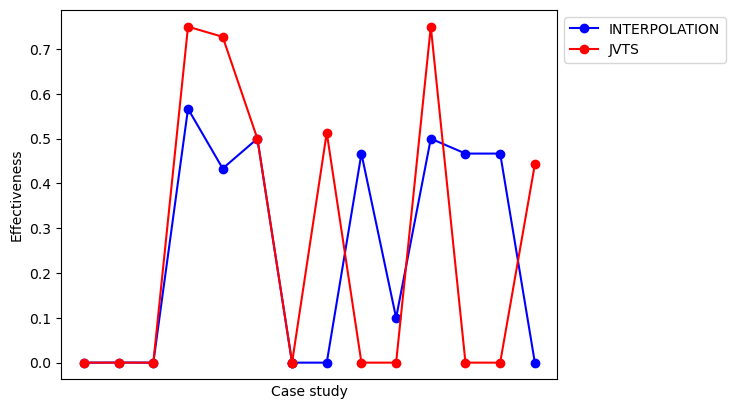

In [24]:
import pandas as pd
import os
import matplotlib.pyplot as plt

# Get spectra files
spectra_folder = "inputs/SYNTECH15-UNREAL"
spectra_files = [f for f in os.listdir(spectra_folder) if f.endswith('.spectra')]
spectra_files.sort()

# Create df_spectra
df_spectra = pd.DataFrame({'Filename': spectra_files})

# List of DataFrames and corresponding column names
dataframes = [
    ("outputs-interpolation/INTERPOLATION-MIN-INF/repairs_average.csv", "INTERPOLATION"),
    ("outputs-symbolic/JVTS/repairs_average.csv", "JVTS")
]

# Merge DataFrames with df_spectra
for file_path, column_name in dataframes:
    df_temp = pd.read_csv(file_path)
    df_temp = df_temp[df_temp["Benchmark"] == "SYNTECH15-UNREAL"]
    df_spectra = df_spectra.merge(df_temp[["Filename", "Effectiveness"]], how="left", on="Filename")
    df_spectra = df_spectra.rename(columns={"Effectiveness": column_name})

# Fill NaN values with 0
df_spectra = df_spectra.fillna(0)

# Plot the data with specified colors
plt.plot(df_spectra['Filename'], df_spectra['INTERPOLATION'], label='INTERPOLATION', color='blue', marker='o')
plt.plot(df_spectra['Filename'], df_spectra['JVTS'], label='JVTS', color='red', marker='o')

# Add labels and title
plt.xlabel('Case study')
plt.ylabel('Effectiveness')

# Hide x-axis
plt.xticks([])

# Place legend on the right outside of the graph
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()
